<a href="https://colab.research.google.com/github/atarilover123/RSO-Telemetry/blob/master/Cassiope_PitchRollYaw_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

In [7]:
file_open = ('/content/CassiopeTelemetry(2014_01_02).csv')

#hour, minute, Second, X position, Y position, Z position, X velocity 1, 
#X velocity 2, X velocity 3, Yaw, Pitch, Roll
colnames=['Hr', 'Min', 'Sec', 'Xp', 'Yp', 'Zp', 'Xv1', 'Xv2', 'Xv3', 'Yaw', 'Pitch', 'Roll']
df = pd.read_csv(file_open, names=colnames)
print(df)

     Hr  Min  Sec         Xp  ...     Xv3       Yaw    Pitch      Roll
0     0   24   16  3815500.0  ... -4176.0 -0.107800 -0.20629  0.080000
1     0   24   17  3819300.0  ... -4181.6 -0.100200 -0.20479  0.080000
2     0   24   20  3829900.0  ... -4197.5 -0.089824 -0.19801  0.074403
3     0   24   21  3833700.0  ... -4203.1 -0.119620 -0.18791  0.055503
4     0   24   22  3837500.0  ... -4208.8 -0.149420 -0.17781  0.036604
..   ..  ...  ...        ...  ...     ...       ...      ...       ...
779   0   37   43  5448000.0  ... -7325.5  0.043158 -4.45100  0.033563
780   0   37   44  5447900.0  ... -7327.0  0.048058 -4.45220  0.036463
781   0   37   45  5447800.0  ... -7328.6  0.052958 -4.45340  0.039363
782   0   37   46  5447700.0  ... -7330.1  0.057858 -4.45460  0.042263
783   0   37   47  5447700.0  ... -7331.6  0.062758 -4.45580  0.045163

[784 rows x 12 columns]


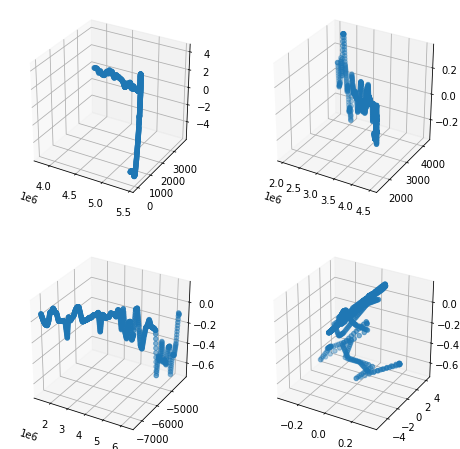

In [8]:
fig = plt.figure(figsize=(8, 8))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(df['Xp'], df['Xv1'], df['Pitch'])

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(df['Yp'], df['Xv2'], df['Roll'])

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(df['Zp'], df['Xv3'], df['Yaw'])

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(df['Roll'], df['Pitch'], df['Yaw'])

plt.show()


In [9]:
print(df['Xp'][0])

3815500.0


In [60]:
from astropy import units as u
from astropy.coordinates import SkyCoord

sc = SkyCoord(x=df['Xp'],y=df['Yp'],z=df['Zp'],unit='km', representation_type='cartesian')

#make heliocentric
hc=sc.transform_to('hcrs')

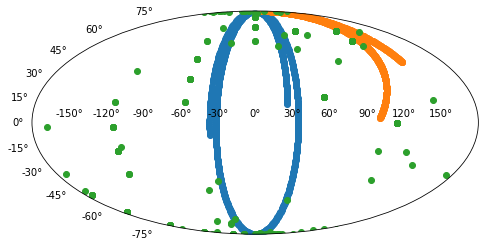

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")

ax.scatter(hc.ra.radian,hc.dec.degree)
ax.scatter(hc.ra.hour,hc.dec.hour)
ax.scatter(hc.ra.hms,hc.dec.hms)

In [21]:
#write data to table -- trying to work ut best format
from astropy.io import ascii
from astropy.table import QTable
c_galactic = hc.galactic

table = QTable([c_galactic], names=["Skycoord"])
ascii.write(table, "Coordinates.csv", format="csv", fast_writer=False, overwrite=True)

t2 = QTable([hc.ra.hour,hc.dec.hour], names =('x','y'))
ascii.write(t2, "c2.csv", format="csv", fast_writer=False, overwrite=True)


